In [1]:
import os

# Fixing working directory
os.chdir('..')

from dataset.local import read_dataset_index, get_img_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

%matplotlib inline

# Loading dataset index and taking a look in some imgs

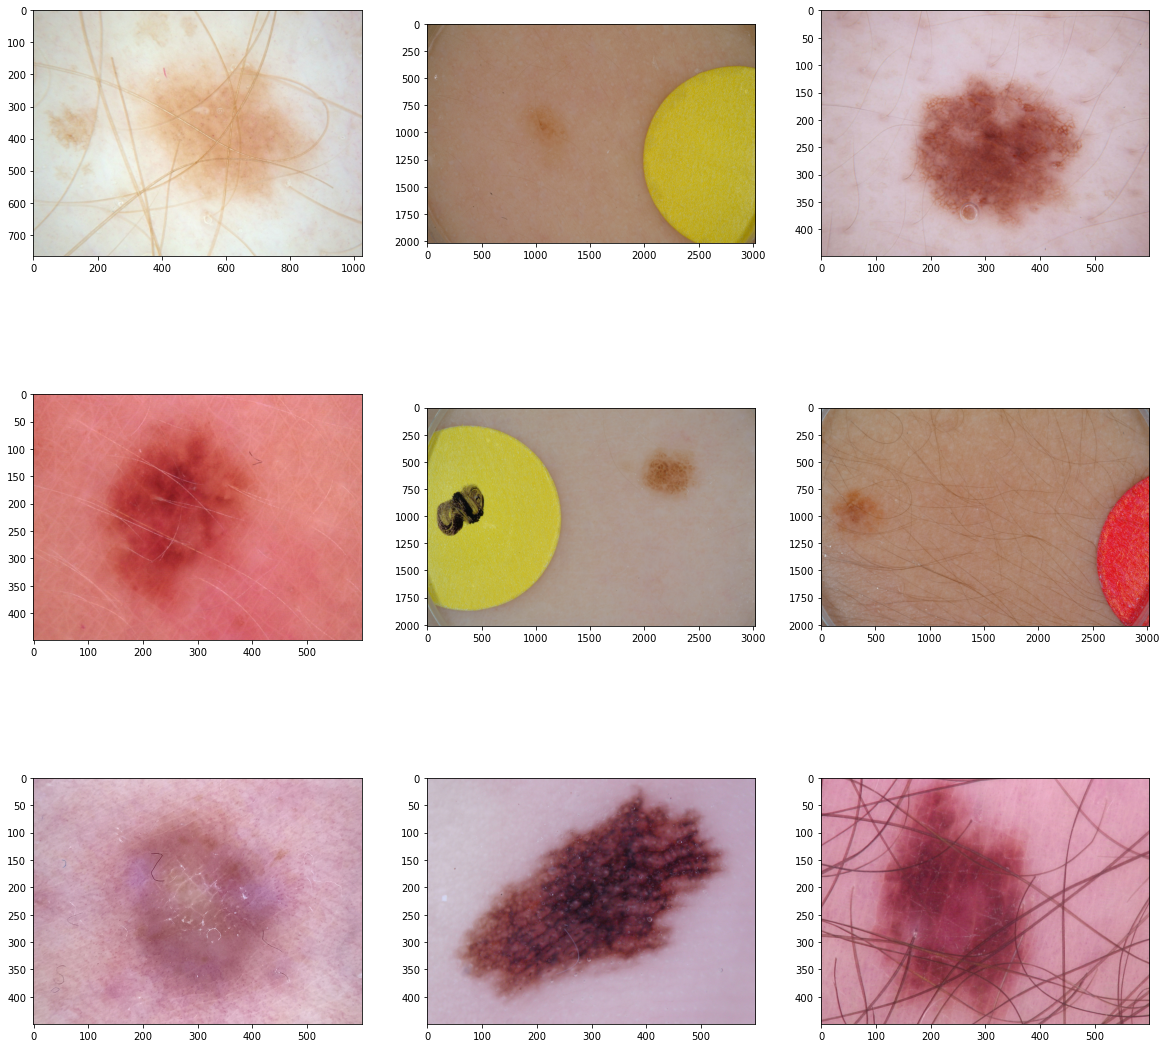

In [2]:
# Load raw dataset index
ds = read_dataset_index()

# Sampling 9 imgs
sample_imgs = ds.sample(9)['name']

# Get the samples data
imgs_data = [get_img_data(sample) for sample in sample_imgs] 

# Plot the imgs
f, a = plt.subplots(3, 3, figsize=(20, 20), squeeze=True)
k = 0
for i in range(3):
    for j in range(3):
        a[j][i].imshow(imgs_data[k])
        k += 1

f.show()
plt.draw()
plt.show()

# **Resizing**

Dataset imgs size distribution

<AxesSubplot:>

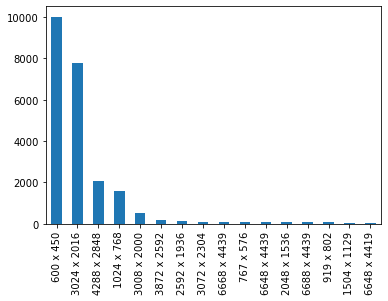

In [3]:
# Generate a new column concatening the pixels_x and piexels_y columns
ds['size'] = ds[['pixels_x', 'pixels_y']].apply(lambda row: ' x '.join(row.values.astype(str)), axis=1)
pix_size_count = ds['size'].value_counts()
pix_size_count[pix_size_count > 40].plot.bar()

Looking at the size's histogram, we are able to see that most of the dataset is divided into 4 main sizes:
 - 600 x 450 = ~10.000 imgs
 - 3024 x 2016 = ~8.000 imgs
 - 4288 x 2848 = ~2.000 imgs
 - 1024 x 768 = ~2.000 imgs

In order to feed the imgs into a Convolutional Neural Network (CNN) we need that all the images have the same size, so all will be downsized to 600 x 450. Some stretching may occur when the aspect ratio isn't the same, but the most part of the information will be preserved (nothing that couldn't happen during the image collect), as shown in the following examples.

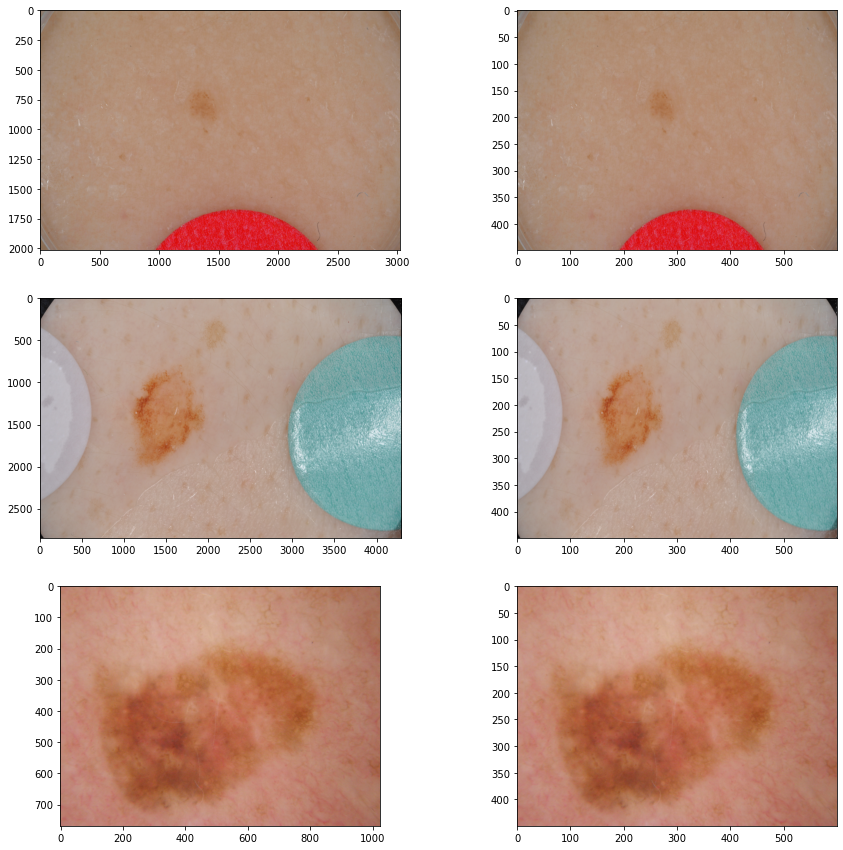

In [4]:
# 3024 x 2016, 4288 x 2848 and 1024 x 768 examples

temp_samples = [get_img_data(ds[ds['size'] == '3024 x 2016'].sample()['name'].iloc[0])]
temp_samples.append(get_img_data(ds[ds['size'] == '4288 x 2848'].sample()['name'].iloc[0]))
temp_samples.append(get_img_data(ds[ds['size'] == '1024 x 768'].sample()['name'].iloc[0]))

imgs = list(temp_samples)
for img in temp_samples:
    imgs.append(Image.fromarray(img).resize((600, 450)))

# Plot original, downsized
f, a = plt.subplots(3, 2, figsize=(15, 15), squeeze=True)
k = 0
for i in range(2):
    for j in range(3):
        a[j][i].imshow(imgs[k])
        k += 1

f.show()
plt.draw()
plt.show()
